<a href="https://colab.research.google.com/github/Foco22/Clustering_API/blob/main/Clustering_Modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Carga de Datos

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Users1.csv to Users1.csv
User uploaded file "Users1.csv" with length 1879259 bytes


In [58]:
df = pd.read_csv('Users1.csv', encoding= 'unicode_escape', sep = ';')
df.head()

,State,Profession,Profesion Key,Agree terms conditions,Card Mastercard,Source,Edad,Region Pais
0,4,Horticultor,1,VERDADERO,FALSO,NaN,26,Libertador General Bernardo OHiggins
1,4,estudiante,2,VERDADERO,VERDADERO,NaN,18,Región Metropolitana de Santiago
2,4,SIN ACTIVIDAD,3,VERDADERO,FALSO,NaN,30,Región Metropolitana de Santiago
3,4,estudiante,2,VERDADERO,FALSO,NaN,25,Atacama
4,4,empleado,4,VERDADERO,FALSO,NaN,57,La Araucanía


In [60]:
df.describe()

,State,Profesion Key,Edad
count,28880.0,28880.000000,28880.000000
mean,4.0,562.830713,32.278670
std,0.0,1026.655293,11.893099
min,4.0,1.000000,18.000000
25%,4.0,8.000000,23.000000
50%,4.0,98.000000,29.000000
75%,4.0,463.000000,39.000000
max,4.0,4617.000000,120.000000


In [5]:
df.isnull().sum()

State                         0
Profession                    0
Profesion Key                 0
Agree terms conditions        0
Card Mastercard               0
Source                    27042
Edad                          0
Region Pais                   0
dtype: int64

# Procesamiento de los datos

In [61]:
df = df.drop(columns='Source')
df = df.drop(columns='State')
df = df.drop(columns='Profesion Key')
df = df.drop(columns='Agree terms conditions')


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


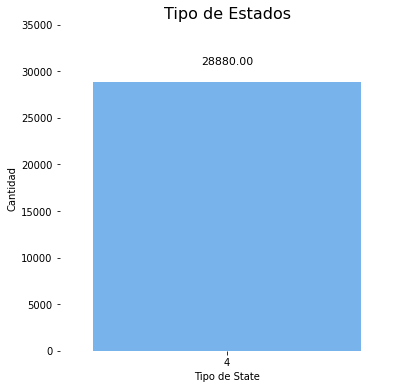

In [41]:
result_b = df['State'].value_counts().reset_index().head(10)
x_axis = result_b['index']
y_axis = result_b['State']



plt.figure(figsize = (6,6))
sns.set_color_codes("pastel")
sns.set_color_codes("muted")
g=sns.barplot(x_axis, y_axis, color='#66b3ff')
ax=g
plt.title('Tipo de Estados', fontsize = 16)

#annotate axis = seaborn axis
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                 textcoords='offset points')
_ = g.set_ylim(0,35000)
plt.xlabel('Tipo de State')
plt.ylabel('Cantidad')
sns.despine(left=True, bottom=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


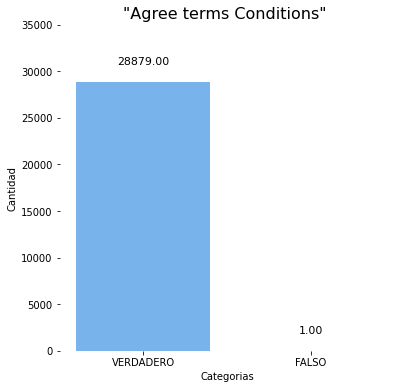

In [42]:
result_b = df['Agree terms conditions'].value_counts().reset_index().head(10)
x_axis = result_b['index']
y_axis = result_b['Agree terms conditions']



plt.figure(figsize = (6,6))
sns.set_color_codes("pastel")
sns.set_color_codes("muted")
g=sns.barplot(x_axis, y_axis, color='#66b3ff')
ax=g
plt.title('"Agree terms Conditions" ', fontsize = 16)

#annotate axis = seaborn axis
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                 textcoords='offset points')
_ = g.set_ylim(0,35000)
plt.xlabel('Categorias')
plt.ylabel('Cantidad')
sns.despine(left=True, bottom=True)

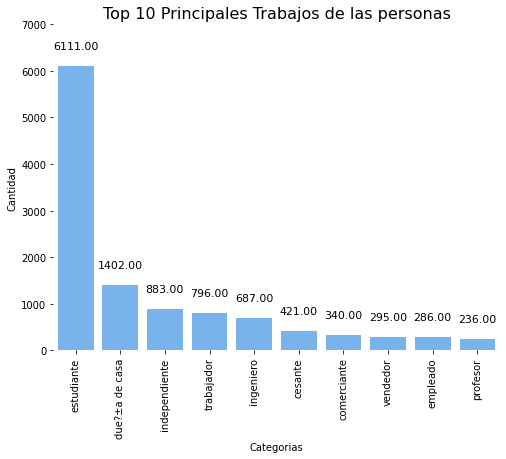

In [62]:
df['Profession'] = df['Profession'].apply(lambda x: x.lower())
df_profesion = df['Profession'].value_counts().reset_index().head(10)

#plt.figure(figsize = (6,6))
#sns.barplot(data = df_profesion, y ='index', x ='Profession', color = 'b')
#plt.title('Top 10 Principales Trabajos de las personas', fontsize = 16)
#sns.despine(left=True, bottom=True)
#plt.xlabel('Profesion')
#plt.ylabel('Cantidad')
#plt.xticks(rotation=90)


result_b = df['Profession'].value_counts().reset_index().head(10)
x_axis = result_b['index']
y_axis = result_b['Profession']



plt.figure(figsize = (8,6))
sns.set_color_codes("pastel")
sns.set_color_codes("muted")
g=sns.barplot(data =result_b , x = x_axis, y = y_axis, color='#66b3ff')
ax=g
plt.title('Top 10 Principales Trabajos de las personas', fontsize = 16)

#annotate axis = seaborn axis
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                 textcoords='offset points')
_ = g.set_ylim(0,7000)
plt.xlabel('Categorias')
plt.xticks(rotation=90)
plt.ylabel('Cantidad')
sns.despine(left=True, bottom=True)


In [63]:
df.shape[0]

28880

In [6]:
#grupo 1: Estudiantes

estudiantes = np.unique(list(df[df['Profession'].str.match('^estu.*')== True]['Profession']))

estudiante = ['madre soltera y estudiante']
#Grupo 2: Asesora del Hogar

dueña_casa = ['due?±a de casa' ,'ama de casa', 'due?±a casa', 'casa','nana de la casa', 'nana','nano','ama dd casa',
             'duena se casa','duesa de casa','due?±o de ogar', 'due?±a de caaa','due?±a de cass','due?ëo de casa',
             'ama de casa y trabajadora', 'due?±a de casa cuidando a mi beb?©', 'hogar', 'casa']

#Grupo 3: Desempleo

desempleo  = ['sin actividad', 'sin empleo', 'sin enpleo','sin ocupaci??n',
       'sin ocupacion', 'sin ocupaciones', 'sin oficio', 'sin ofu',
       'sin profecion', 'sin profesion', 'sin trabaj??', 'sin trabajo',
       'sin trabajo actualmente', 'sin trabajo ayuden', 'sin vocacion',
       'desempl', 'desempleada', 'desempleado', 'desempleo',
       'desenpkeado', 'desenpleada', 'desenpleado','cesante']

#Grupo 4: informacion erronea.

sin_informacion = ['sin informaci??n','nada', 'nada','nada de momento', 'nada por el momento', 'nadaa'
                  'no aplica', 'mm piping', '?±i?±os', 'dkdjjffn', 'uy curiosos', 'nnnnnnnnnnnnn' , 'trabajo']

In [64]:
def profesion_agrupacion(df):
    df['Profesion_agrupacion'] = ''
    
    conteo= 0
    for i in df['Profession']:
        if i in estudiantes:
            df.iloc[conteo,4] = 'Estudiante'
        elif i in dueña_casa:
            df.iloc[conteo,4] = 'Dueña de casa'
        elif i in desempleo:
            df.iloc[conteo,4] = 'Desempleado/a'
        elif i in sin_informacion:
            df.iloc[conteo,4] = 'Sin informacion'
        else:
            df.iloc[conteo,4] = 'Trabajo informado'
        conteo = conteo +1 
profesion_agrupacion(df)
df = df.drop(columns='Profession')
df.head()

,Card Mastercard,Edad,Region Pais,Profesion_agrupacion
0,FALSO,26,Libertador General Bernardo OHiggins,Trabajo informado
1,VERDADERO,18,Región Metropolitana de Santiago,Estudiante
2,FALSO,30,Región Metropolitana de Santiago,Desempleado/a
3,FALSO,25,Atacama,Estudiante
4,FALSO,57,La Araucanía,Trabajo informado


In [68]:
df.shape[0]

28524

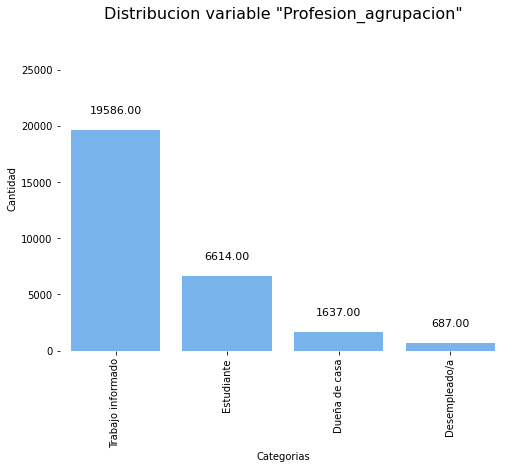

In [66]:
df = df.loc[df['Profesion_agrupacion'] != 'Sin informacion']
df_profesion_agrupacion = df['Profesion_agrupacion'].value_counts().reset_index().head(10)

#result_b = df['Profession'].value_counts().reset_index().head(10)
x_axis = df_profesion_agrupacion['index']
y_axis = df_profesion_agrupacion['Profesion_agrupacion']



plt.figure(figsize = (8,6))
sns.set_color_codes("pastel")
sns.set_color_codes("muted")
g=sns.barplot(data =df_profesion_agrupacion , x = x_axis, y = y_axis, color='#66b3ff')
ax=g
plt.title('Distribucion variable "Profesion_agrupacion"', fontsize = 16)

#annotate axis = seaborn axis
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                 textcoords='offset points')
_ = g.set_ylim(0,29000)
plt.xlabel('Categorias')
plt.xticks(rotation=90)
plt.ylabel('Cantidad')
sns.despine(left=True, bottom=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


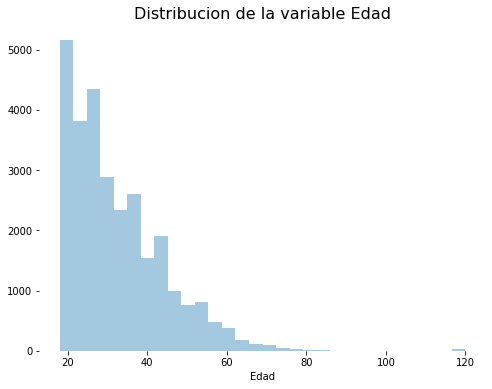

In [47]:
#Edad
plt.figure(figsize = (8,6))
sns.distplot(df['Edad'], kde = False, bins = 30)
plt.title('Distribucion de la variable Edad', fontsize = 16)
sns.despine(left=True, bottom=True)

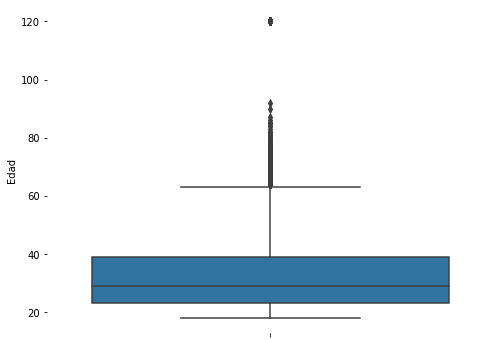

In [29]:
plt.figure(figsize = (8,6))
sns.boxplot(y = 'Edad',data = df)
sns.despine(left=True, bottom=True)

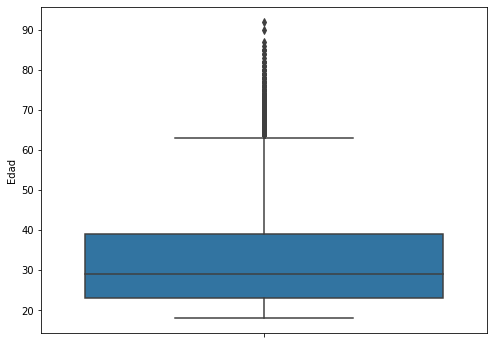

In [69]:
df = df.loc[df['Edad'] < 100]
plt.figure(figsize = (8,6))
sns.boxplot(y = 'Edad',data = df)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

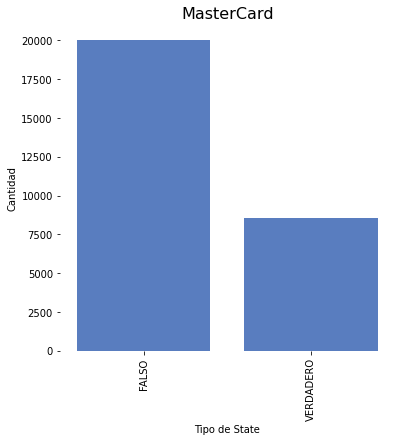

In [11]:
#MasterCard

df_mastercard = df['Card Mastercard'].value_counts().reset_index().head(10)

plt.figure(figsize = (6,6))
sns.barplot(data = df_mastercard, x ='index', y ='Card Mastercard', color = 'b')
plt.title('MasterCard', fontsize = 16)
sns.despine(left=True, bottom=True)
plt.xlabel('Tipo de State')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)


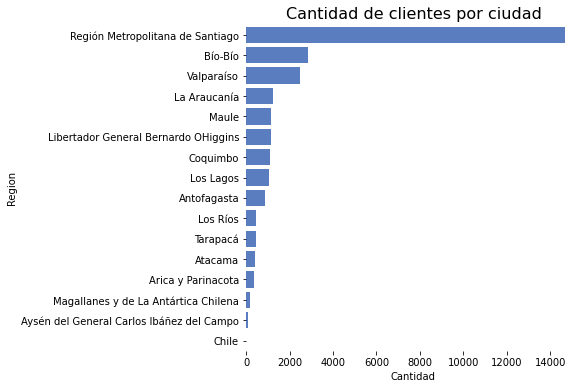

In [12]:
#Region Pais

df_region = df['Region Pais'].value_counts().reset_index()

plt.figure(figsize = (6,6))
sns.barplot(data = df_region, y ='index', x ='Region Pais', color = 'b')

plt.ylabel('Region')
plt.xlabel('Cantidad')

plt.title('Cantidad de clientes por ciudad', fontsize = 16)
sns.despine(left=True, bottom=True)

Text(0.5, 0, 'Region')

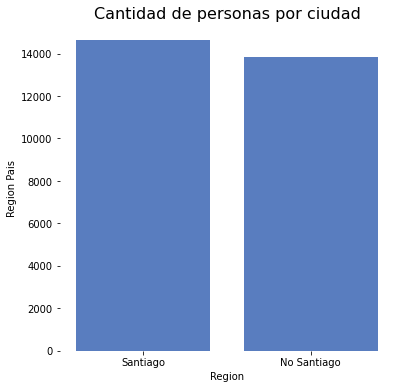

In [70]:
df = df.loc[df['Region Pais'] != 'Chile']

def region(x):
   if  x == 'Región Metropolitana de Santiago':
       return 'Santiago'
   else:
       return 'No Santiago'

df['Region Pais'] = df['Region Pais'].apply(lambda x : region(x))

df_region = df['Region Pais'].value_counts().reset_index()

plt.figure(figsize = (6,6))
sns.barplot(data = df_region, x ='index', y ='Region Pais', color = 'b')

plt.title('Cantidad de personas por ciudad', fontsize = 16)
sns.despine(left=True, bottom=True)

plt.xlabel('Region')

In [71]:
df.shape[0]

28484

## Analisis Multi-Variado

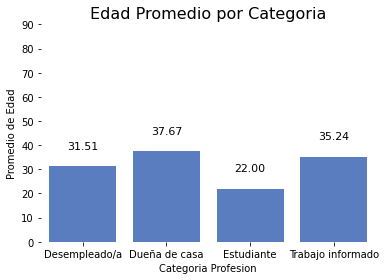

In [53]:
df['Edad'] = df['Edad'].apply(lambda x: int(x))

df_promedio = df[['Profesion_agrupacion','Edad']].groupby('Profesion_agrupacion').mean().reset_index()

g = sns.barplot(data = df_promedio, x = 'Profesion_agrupacion', y = 'Edad', color = 'b')

ax=g
#annotate axis = seaborn axis
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                 textcoords='offset points')
_ = g.set_ylim(0,90)

plt.ylabel('Promedio de Edad')
plt.xlabel('Categoria Profesion')


plt.title('Edad Promedio por Categoria', fontsize = 16)
sns.despine(left=True, bottom=True)

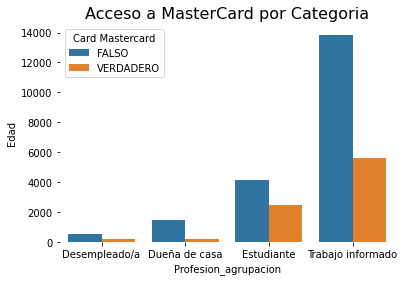

In [96]:

df_card = df.groupby(['Profesion_agrupacion','Card Mastercard']).count()['Edad'].reset_index()

sns.barplot(data = df_card, x = 'Profesion_agrupacion', y = 'Edad' , hue =  'Card Mastercard')
plt.title('Acceso a MasterCard por Categoria', fontsize = 16)
sns.despine(left=True, bottom=True)

Text(0.5, 0, 'Categoria Profesion')

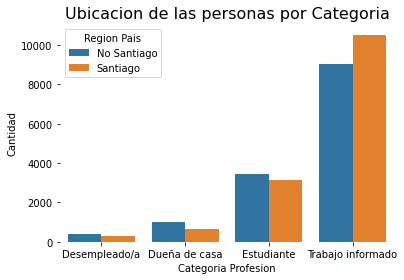

In [55]:
df_region = df.groupby(['Profesion_agrupacion','Region Pais']).count()['Edad'].reset_index()

sns.barplot(data = df_region, x = 'Profesion_agrupacion', y = 'Edad' , hue =  'Region Pais')
plt.title('Ubicacion de las personas por Categoria', fontsize = 16)
sns.despine(left=True, bottom=True)

plt.ylabel('Cantidad')
plt.xlabel('Categoria Profesion')

## Columnas Dummy

In [73]:
df_dummy = df.copy()
df_dummy.head()

,Card Mastercard,Edad,Region Pais,Profesion_agrupacion
0,FALSO,26,No Santiago,Trabajo informado
1,VERDADERO,18,Santiago,Estudiante
2,FALSO,30,Santiago,Desempleado/a
3,FALSO,25,No Santiago,Estudiante
4,FALSO,57,No Santiago,Trabajo informado


In [74]:
def dummies(df_dummy):
  df_dummy = pd.get_dummies(df_dummy, columns=['Card Mastercard'])
  df_dummy = df_dummy.drop(columns='Card Mastercard_FALSO')

  df_dummy = pd.get_dummies(df_dummy, columns=['Profesion_agrupacion'])
  df_dummy = df_dummy.drop(columns='Profesion_agrupacion_Desempleado/a')

  df_dummy = pd.get_dummies(df_dummy, columns=['Region Pais'])
  df_dummy = df_dummy.drop(columns='Region Pais_No Santiago')
  
  return df_dummy

df_dummy = dummies(df_dummy)

In [75]:
df_dummy.head()

,Edad,Card Mastercard_VERDADERO,Profesion_agrupacion_Dueña de casa,Profesion_agrupacion_Estudiante,Profesion_agrupacion_Trabajo informado,Region Pais_Santiago
0,26,0,0,0,1,0
1,18,1,0,1,0,1
2,30,0,0,0,0,1
3,25,0,0,1,0,0
4,57,0,0,0,1,0


# Clustering

In [17]:
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

In [76]:
df_modelo = df_dummy.copy()

df_modelo

,Edad,Card Mastercard_VERDADERO,Profesion_agrupacion_Dueña de casa,Profesion_agrupacion_Estudiante,Profesion_agrupacion_Trabajo informado,Region Pais_Santiago
0,26,0,0,0,1,0
1,18,1,0,1,0,1
2,30,0,0,0,0,1
3,25,0,0,1,0,0
4,57,0,0,0,1,0
...,...,...,...,...,...,...
28846,27,1,0,0,1,1
28851,29,1,0,0,1,1
28855,28,1,0,0,1,1
28858,36,0,0,0,1,1


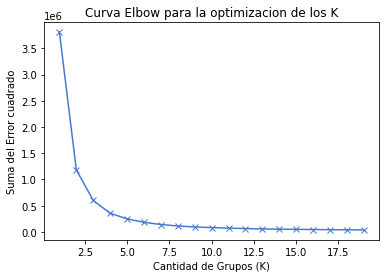

<Figure size 432x288 with 0 Axes>

In [67]:
#Curva Eblow

sum_of_squared_distances = []
K = range(1,20)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(df_modelo)
    sum_of_squared_distances.append(k_means.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Cantidad de Grupos (K)')
plt.ylabel('Suma del Error cuadrado')
plt.title('Curva Elbow para la optimizacion de los K')
plt.show()
sns.despine(left=True, bottom=True)

# Optimo y Visualizacion

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


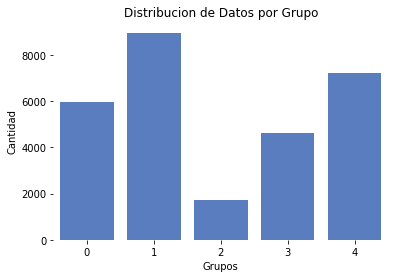

In [79]:
k_means_optimo = KMeans(n_clusters=5,random_state = 11324)
model = k_means_optimo.fit(df_modelo)
y_hat_optimo = k_means_optimo.predict(df_modelo)
labels_optimo = k_means_optimo.labels_

#sns.set(color = 'w')
sns.countplot(labels_optimo, color = 'b'  )
plt.title('Distribucion de Datos por Grupo')
plt.xlabel('Grupos')
plt.ylabel('Cantidad')
sns.despine(left=True, bottom=True)

In [83]:
df = df.drop(columns='Categoria')

In [84]:
results = pd.DataFrame(labels_optimo ,columns =['Categoria'])
df = df.reset_index()
df = df.drop(columns='index')
df = pd.concat([df, results], axis=1)
df.head()

,Card Mastercard,Edad,Region Pais,Profesion_agrupacion,Categoria
0,FALSO,26,No Santiago,Trabajo informado,4
1,VERDADERO,18,Santiago,Estudiante,1
2,FALSO,30,Santiago,Desempleado/a,4
3,FALSO,25,No Santiago,Estudiante,4
4,FALSO,57,No Santiago,Trabajo informado,2


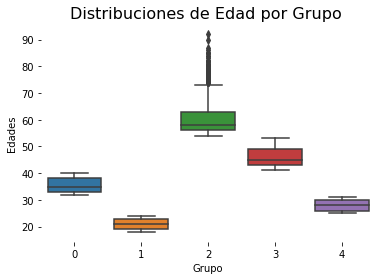

In [85]:
sns.boxplot( data = df, y = 'Edad', x = 'Categoria')
plt.title('Distribuciones de Edad por Grupo ', fontsize = 16)
plt.xlabel('Grupo')
plt.ylabel('Edades')
sns.despine(left=True, bottom=True)

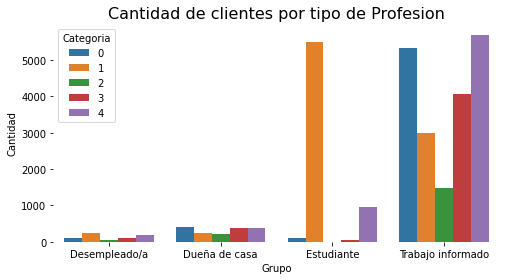

In [89]:

categoria = df.groupby(['Categoria','Profesion_agrupacion']).count()['Card Mastercard'].reset_index()

plt.figure(figsize = (8,4))
sns.barplot( data = categoria, hue = 'Categoria', y = 'Card Mastercard', x = 'Profesion_agrupacion')

plt.title('Cantidad de clientes por tipo de Profesion', fontsize = 16)
plt.xlabel('Grupo')
plt.ylabel('Cantidad')
sns.despine(left=True, bottom=True)


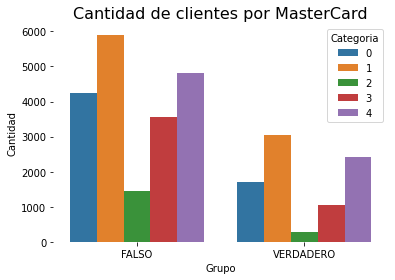

In [87]:
master = df.groupby(['Card Mastercard','Categoria']).count()['Profesion_agrupacion'].reset_index()

sns.barplot( data = master, x = 'Card Mastercard', hue = 'Categoria', y = 'Profesion_agrupacion')

plt.title('Cantidad de clientes por MasterCard', fontsize = 16)
plt.xlabel('Grupo')
plt.ylabel('Cantidad')
sns.despine(left=True, bottom=True)

# Serializar el modelo

In [42]:
import joblib
joblib.dump(model, 'modelo_clustering.pkl')

modelo_columnas = list(df_modelo.columns)

joblib.dump(modelo_columnas, 'modelo_columns_clustering.pkl')

['modelo_columns_clustering.pkl']

In [54]:
model.predict([[60,0,1,0,0,1]])

array([1], dtype=int32)

In [53]:
df_modelo.columns

Index(['Edad', 'Card Mastercard_VERDADERO',
       'Profesion_agrupacion_Dueña de casa', 'Profesion_agrupacion_Estudiante',
       'Profesion_agrupacion_Trabajo informado', 'Region Pais_Santiago'],
      dtype='object')